In [3]:
setwd('/import/a.jif/')

In [4]:
library(Seurat)

In [5]:
daa = readRDS('./B_cell.after_ano.rds')

In [6]:
DefaultAssay(daa) = 'RNA'

In [7]:
library(Seurat)

In [8]:
Idents(daa) = 'celltype'

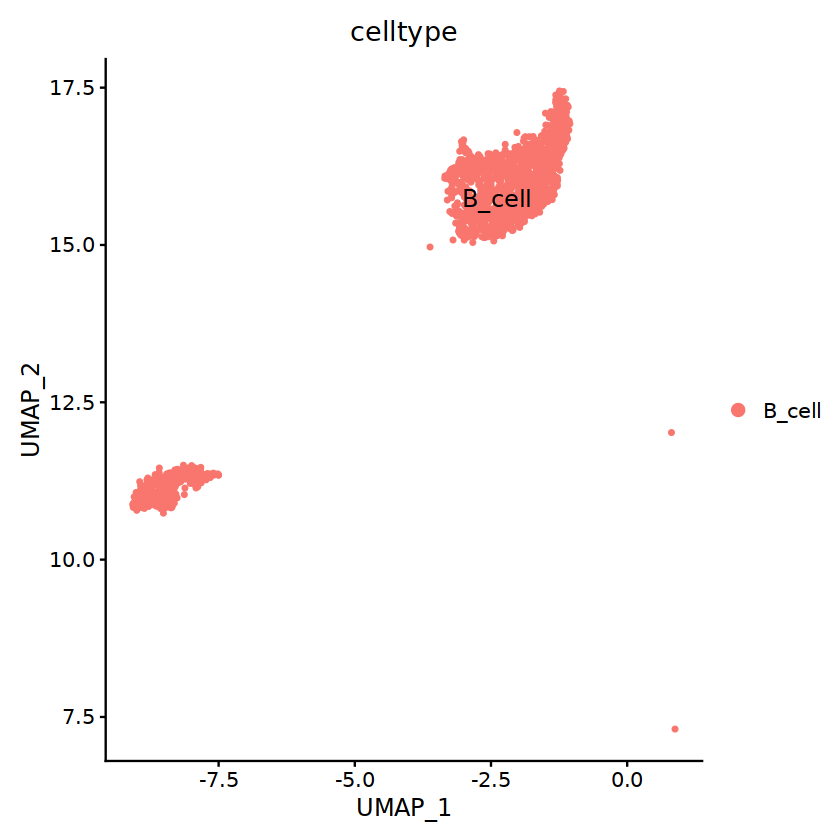

In [9]:
DimPlot(daa, group.by="celltype", label=T, label.size=5, reduction='umap')

In [10]:
immune.combined = daa

In [11]:
library(harmony)
DefaultAssay(immune.combined) = 'RNA'
sceList <- SplitObject(immune.combined, split.by = "orig.ident")
single.ob=merge(sceList[[1]],sceList[2:length(sceList)])
DefaultAssay(single.ob) = 'RNA'
scRNA_harmony = single.ob
scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
##整合
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})
scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:30)
scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:30) %>% FindClusters(resolution =  0.1)
##作图
#group_by_cluster

Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 4.2.3"
Centering and scaling data matrix

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony converged after 4 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


   user  system elapsed 
  1.563   4.588   0.586 

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
13:37:33 UMAP embedding parameters a = 0.9922 b = 1.112

13:37:33 Read 1710 rows and found 30 numeric columns

13:37:33 Using Annoy for neighbor search, n_neighbors = 30

13:37:33 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:37:33 Writing NN index file to temp file /tmp/RtmppZZT3u/file182665d4857a3

13:37:33 Searching Annoy index using 1 thread, search_k = 3000

13:37:33 Annoy recall = 100%

13:37:34 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1710
Number of edges: 77185

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9513
Number of communities: 3
Elapsed time: 0 seconds


In [12]:
options(repr.plot.width = 12,repr.plot.height = 8)

In [13]:
table(scRNA_harmony$group)


  Con Tumor 
  121  1589 

In [14]:
options(repr.plot.width = 8,repr.plot.height = 6)

In [35]:
Idents(scRNA_harmony) = 'seurat_clusters'

In [36]:
scRNA_harmony = subset(scRNA_harmony,idents = c(0,1))

In [39]:
options(repr.plot.width = 5,repr.plot.height = 5)

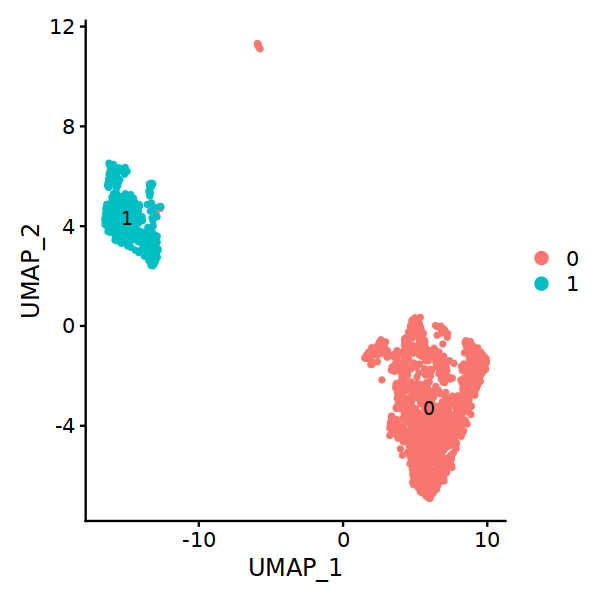

In [40]:
DimPlot(scRNA_harmony, reduction = "umap",ncol = 2,label = T)

In [41]:
ggsave('Bell.figure1.pdf',width = 5,height = 6)

In [42]:
Idents(scRNA_harmony) = 'seurat_clusters'
DefaultAssay(scRNA_harmony) = 'RNA'
sce.markers <- FindAllMarkers(object = scRNA_harmony, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
 



Calculating cluster 0

Calculating cluster 1



In [48]:
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(8, avg_log2FC)

In [54]:
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(8, avg_log2FC)

In [55]:
library(ggplot2)

In [56]:
#HAVCR2

In [57]:
sce.markers['MZB1',]

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
MZB1,4.677952e-190,3.44547,0.997,0.153,1.309078e-185,0,MZB1


Warning message:
"Scaling data with a low number of groups may produce misleading results"


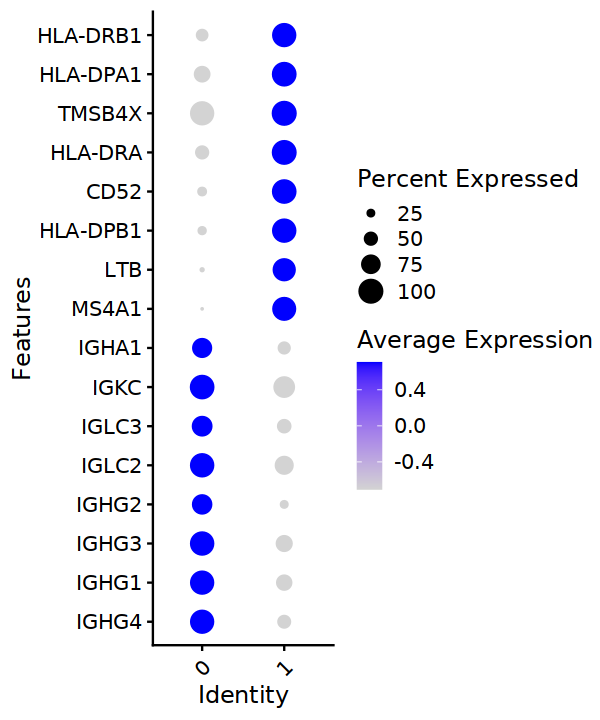

In [58]:
options(repr.plot.height = 6,repr.plot.width = 5)

 DotPlot(scRNA_harmony, features = unique(top5$gene) ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [59]:
ggsave('Bell.figure2.pdf',width = 5,height = 6)

In [60]:
Idents(scRNA_harmony)  ='seurat_clusters'

celltype = data.frame(
    cluster = c(0,1),
    celltype = c('plasma','B'
                )
)

for(i in 1:nrow(celltype)){
  scRNA_harmony@meta.data[which(scRNA_harmony@meta.data$seurat_clusters == celltype$cluster[i]),'celltype'] <- celltype$celltype[i]}

In [61]:
SCE1 = scRNA_harmony

In [62]:
Idents(SCE1) = 'celltype'

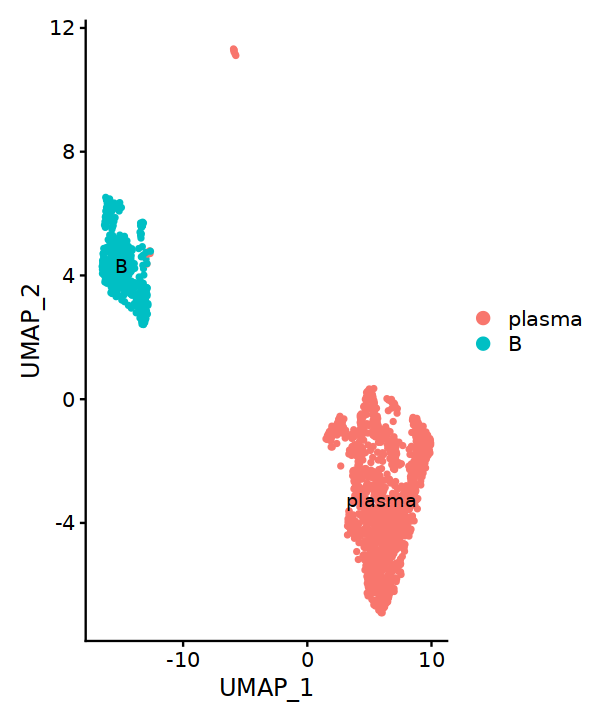

In [63]:
DimPlot(SCE1, reduction = "umap", label=T) 

In [64]:
ggsave('Bell.figure3.pdf',width = 5,height = 6)

In [66]:
saveRDS(SCE1,file = 'final_Bcell.rds')